In [ ]:
## CSCI 4150U - Data Mining - Lab 7
# Name: Thinh Le
# Student ID: 100741899
# Dataset: waveform.data

In [1]:
import sys
import pandas as pd
import numpy as np
from sklearn import cluster
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'Class']
data = pd.read_csv('./data2/waveform.data', header=None, index_col=None, names=headers)
data.drop(columns=['Class'], inplace=True)
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,4.20,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.61,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,1.45,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,4.05,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.79,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,4.54,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.50,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,4.25,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,4.85,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37


Text(0, 0.5, 'SSE')

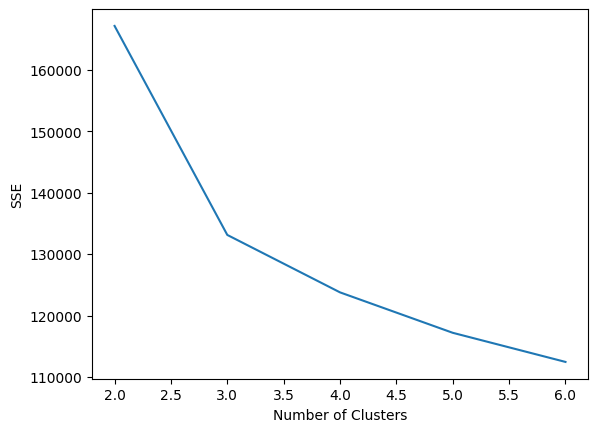

In [3]:
numClusters = [2, 3, 4, 5, 6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [4]:
# According to the graph, we can conclude that the best k for this dataset is k=3, using the elbow approach.

In [5]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(data)
centroids = k_means.cluster_centers_

df_centroids = pd.DataFrame(centroids, columns=data.columns)
df_centroids

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,-0.005143,0.132349,0.257690,0.366029,0.461007,0.754571,0.997547,1.060341,1.086782,1.807085,...,3.056540,3.524928,4.074477,4.664202,3.792426,2.925303,2.199565,1.456469,0.776832,-0.012646
1,0.012998,0.113055,0.228287,0.278137,0.353562,1.302941,2.222684,2.884390,3.624547,4.373076,...,4.401320,3.617459,2.885418,2.173804,1.289886,0.413162,0.310771,0.179743,0.115789,0.007573
2,0.009467,0.726968,1.445188,2.191432,2.931494,3.812072,4.706070,4.114211,3.541084,3.105772,...,1.878175,1.077013,1.006901,0.961999,0.730354,0.436901,0.319433,0.228933,0.119034,-0.053066


In [6]:
data['Cluster ID'] = k_means.labels_
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Cluster ID
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,0
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,2
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,2
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42,0
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18,2
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27,1
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37,0


In [7]:
def closest_points(data, df_centroid):
    df_points = data.drop(columns=['Cluster ID'])
    points = df_points.to_numpy()
    centroid = df_centroid.to_numpy()
    
    dists = []
    for point in points:
        dists.append(np.linalg.norm(point - centroid[0]))

    closest_indexes = []
    for i in range(5):
        index = np.where(dists == np.min(dists))[0][0]
        dists[index] = sys.maxsize
        closest_indexes.append(index)
        
    df_closest = data.iloc[closest_indexes]
    return df_closest


In [8]:
data_c0 = data[data['Cluster ID'] == 0]
df_c0 = df_centroids.loc[[0]]
closest_points(data_c0, df_c0)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Cluster ID
4275,-0.47,0.58,0.56,0.80,-1.08,0.85,1.96,0.38,1.41,2.02,...,3.96,3.74,3.78,4.08,2.96,1.89,1.04,1.42,0.08,0
3582,-0.12,-0.06,-0.20,-0.39,0.10,0.76,1.17,2.01,1.77,1.81,...,4.11,4.08,5.29,3.32,2.35,2.81,2.15,-0.02,-0.47,0
4888,0.99,-0.65,0.53,-0.96,0.98,0.36,-0.01,1.61,0.96,2.95,...,4.15,4.26,4.49,4.23,3.14,1.75,1.61,0.40,-0.22,0
176,1.47,-0.95,1.05,0.20,0.16,0.24,0.83,1.11,2.11,2.27,...,4.52,3.79,4.50,3.15,3.18,1.61,1.31,0.61,0.03,0
1852,1.11,-0.38,0.29,0.06,-1.07,-0.02,0.22,0.69,0.59,1.30,...,2.80,4.10,5.40,3.28,2.99,2.39,1.88,1.28,0.07,0


In [9]:
data_c1 = data[data['Cluster ID'] == 1]
df_c1 = df_centroids.loc[[1]]
closest_points(data_c1, df_c1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Cluster ID
2467,0.27,-0.68,0.03,0.11,0.28,1.78,2.57,1.98,2.77,4.82,...,3.53,2.29,2.20,1.41,-0.36,0.15,-1.10,0.39,-1.25,1
4785,0.76,-0.43,-0.25,-0.12,-0.09,1.90,1.80,2.52,3.63,3.90,...,3.84,2.44,2.09,0.79,1.38,-0.52,1.63,-0.20,1.17,1
1491,-0.02,1.25,0.21,1.55,-0.30,2.03,2.68,3.30,3.65,2.88,...,3.83,2.11,2.04,1.72,0.33,1.09,-0.37,-0.59,0.43,1
3161,-0.15,-0.80,0.79,1.36,0.21,2.38,2.14,3.78,4.20,4.35,...,3.52,2.76,2.84,1.78,-0.79,0.69,-0.25,0.89,0.73,1
2218,-0.63,-0.04,-0.74,-0.59,1.42,2.23,3.03,2.67,3.59,4.05,...,3.06,3.82,2.54,-0.49,0.41,0.72,0.07,-0.19,-0.09,1


In [10]:
data_c2 = data[data['Cluster ID'] == 2]
df_c2 = df_centroids.loc[[2]]
closest_points(data_c2, df_c2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Cluster ID
4107,0.36,0.51,1.92,0.95,3.39,3.70,5.07,4.50,3.35,3.41,...,1.93,0.60,1.16,1.48,0.68,1.64,-0.23,0.08,0.46,2
1936,-1.00,0.63,1.59,1.23,2.81,4.22,4.99,3.59,3.15,3.20,...,-0.24,0.14,1.29,0.54,-0.38,0.67,0.95,0.52,0.55,2
1072,-0.56,0.60,2.21,2.82,3.33,3.72,5.93,3.98,3.01,3.41,...,0.18,0.41,0.44,1.66,0.42,-0.30,0.46,-0.55,0.49,2
2107,1.00,2.44,1.27,1.84,2.67,3.65,5.14,4.16,2.75,2.38,...,0.67,1.65,0.49,0.44,0.62,1.22,-0.12,0.03,-0.41,2
78,0.55,1.79,1.36,3.26,2.49,3.77,4.66,5.24,3.94,2.76,...,1.32,1.22,2.49,1.74,0.20,0.60,-0.28,0.40,-0.44,2


In [11]:
X = data.drop(['Cluster ID'], axis=1)
X_sample = X.head(100)

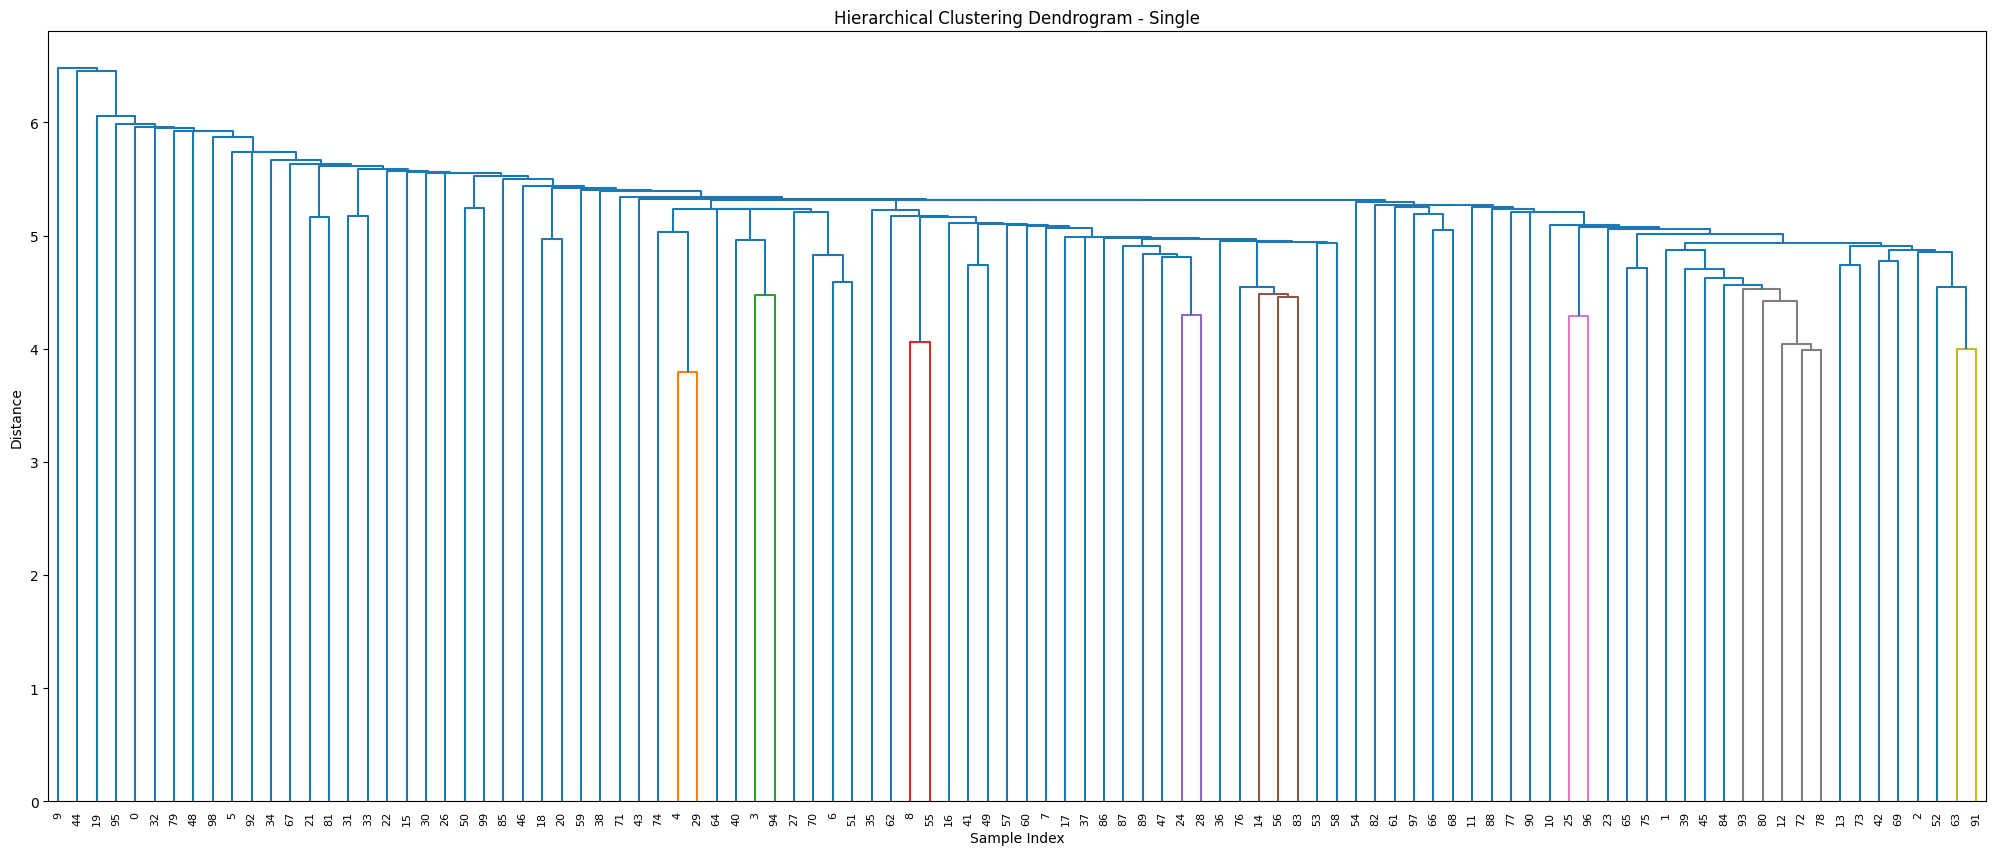

In [12]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Single')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z, leaf_font_size=8.)

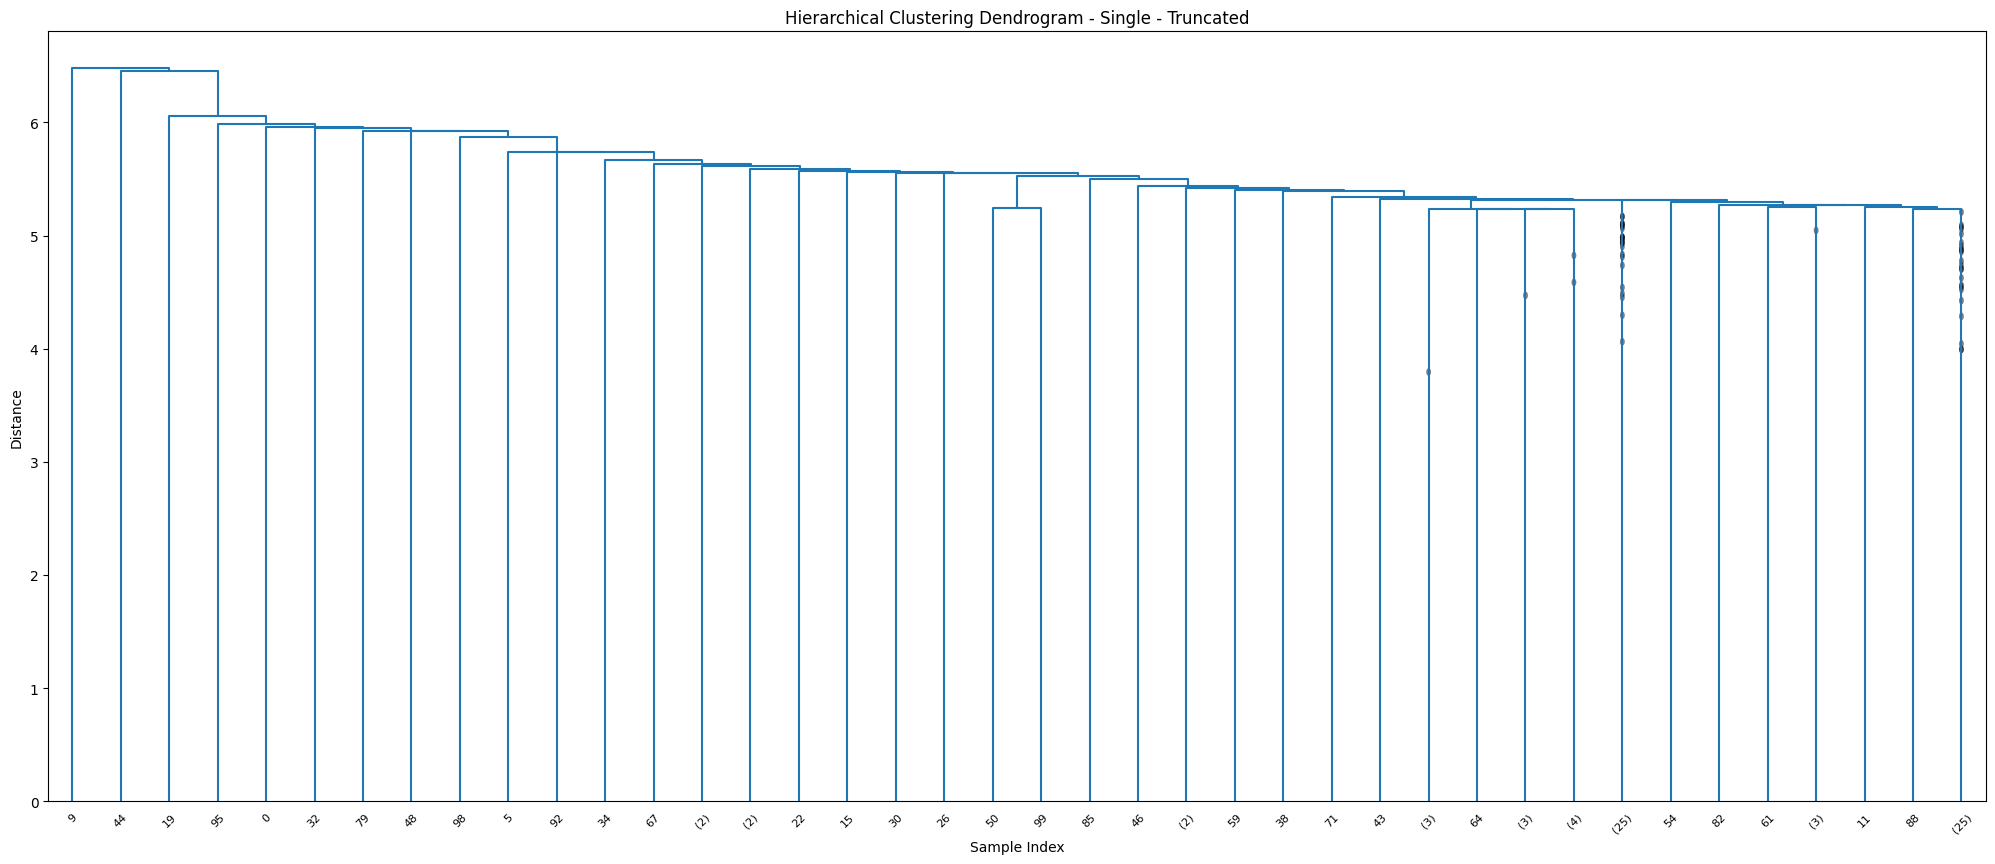

In [13]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Single - Truncated')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z, leaf_font_size=8., truncate_mode='lastp', p=40, show_contracted=True)

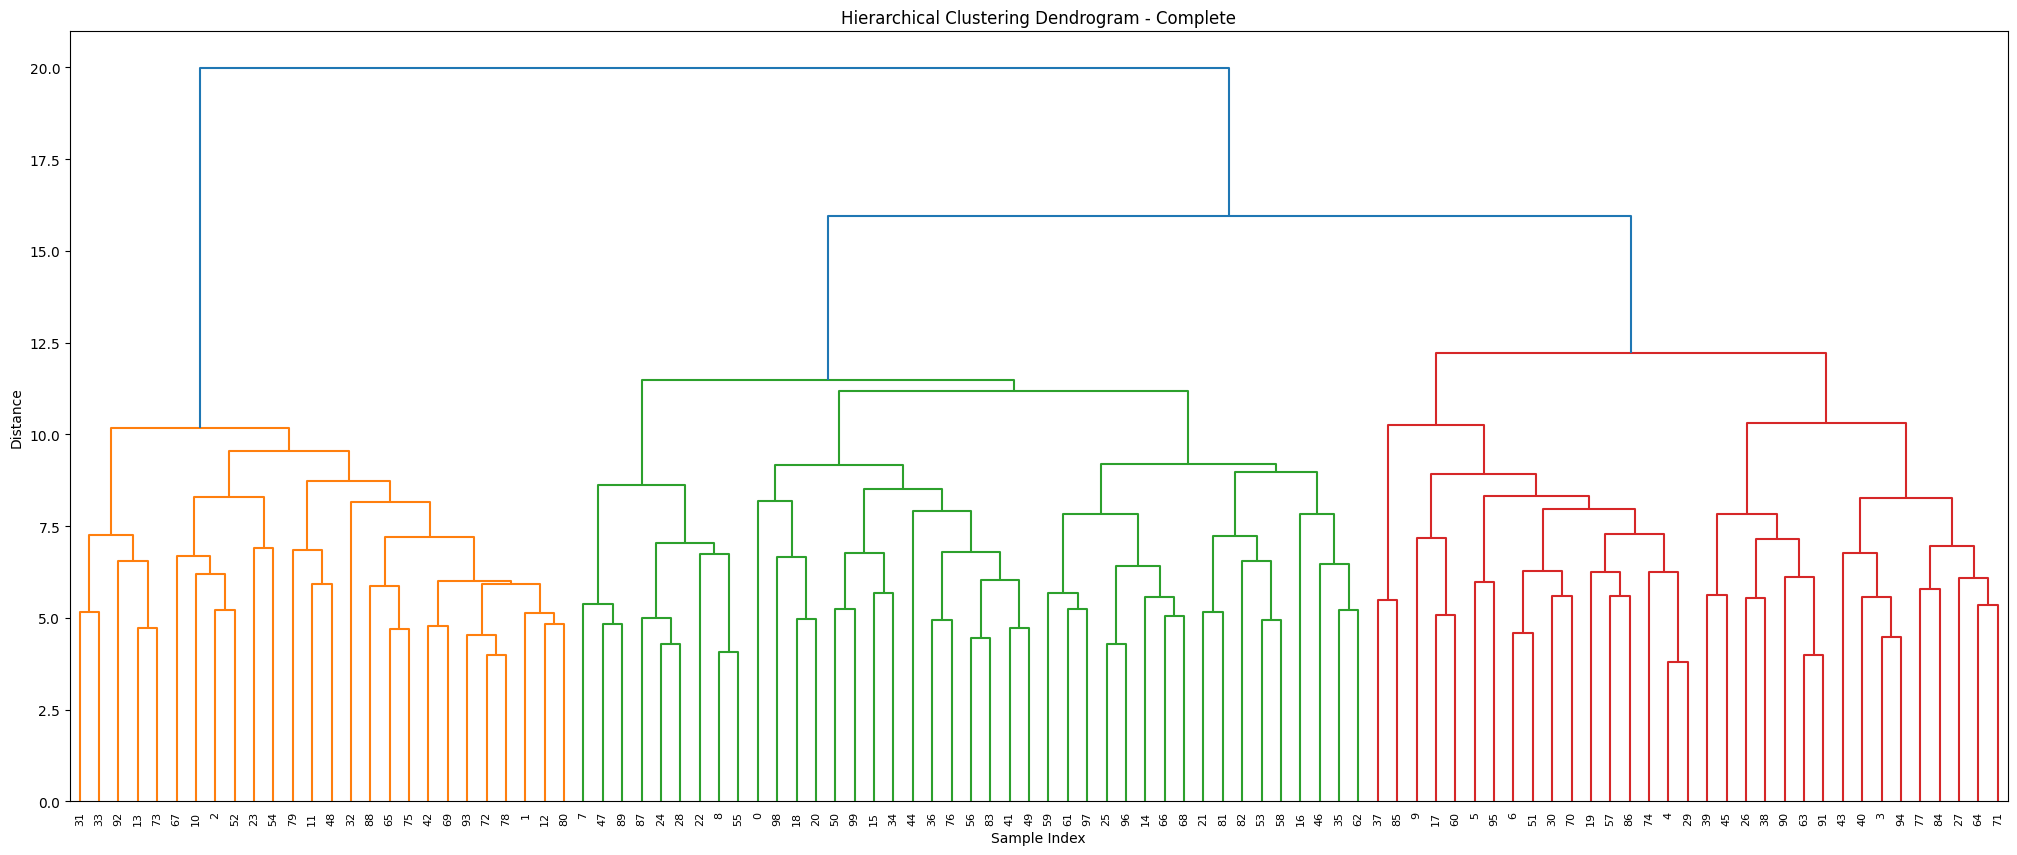

In [14]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Complete')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z, leaf_font_size=8.)

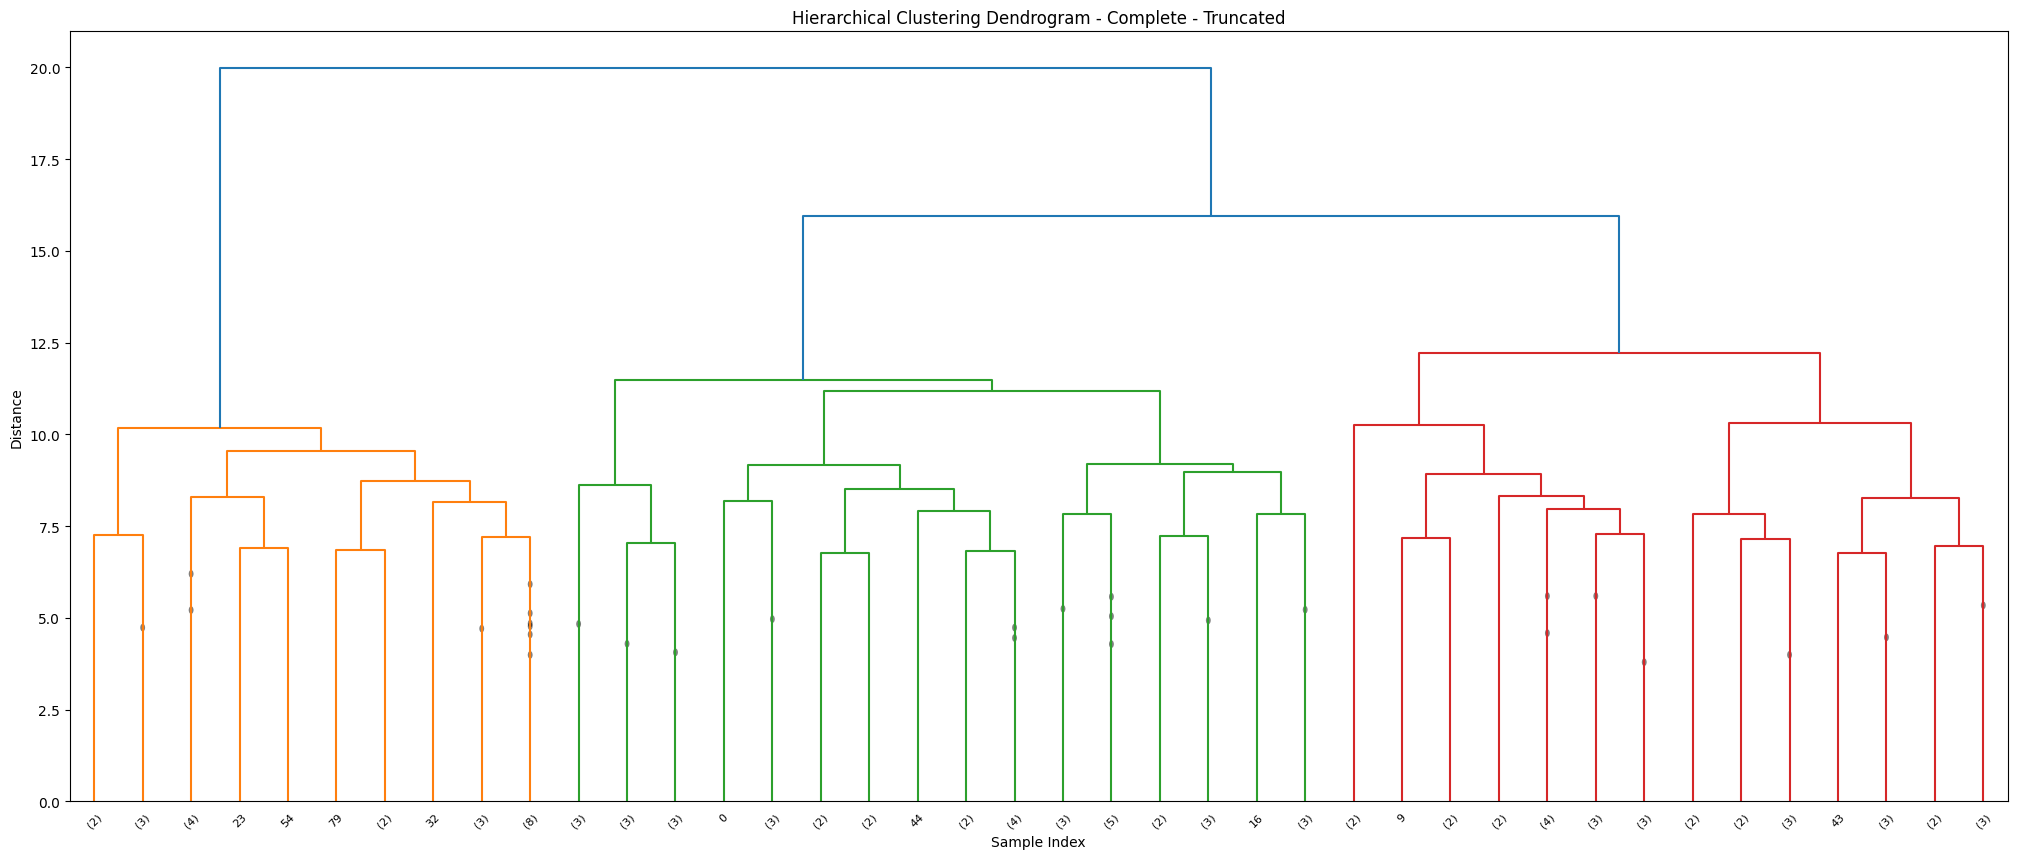

In [15]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Complete - Truncated')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z, leaf_font_size=8., truncate_mode='lastp', p=40, show_contracted=True)

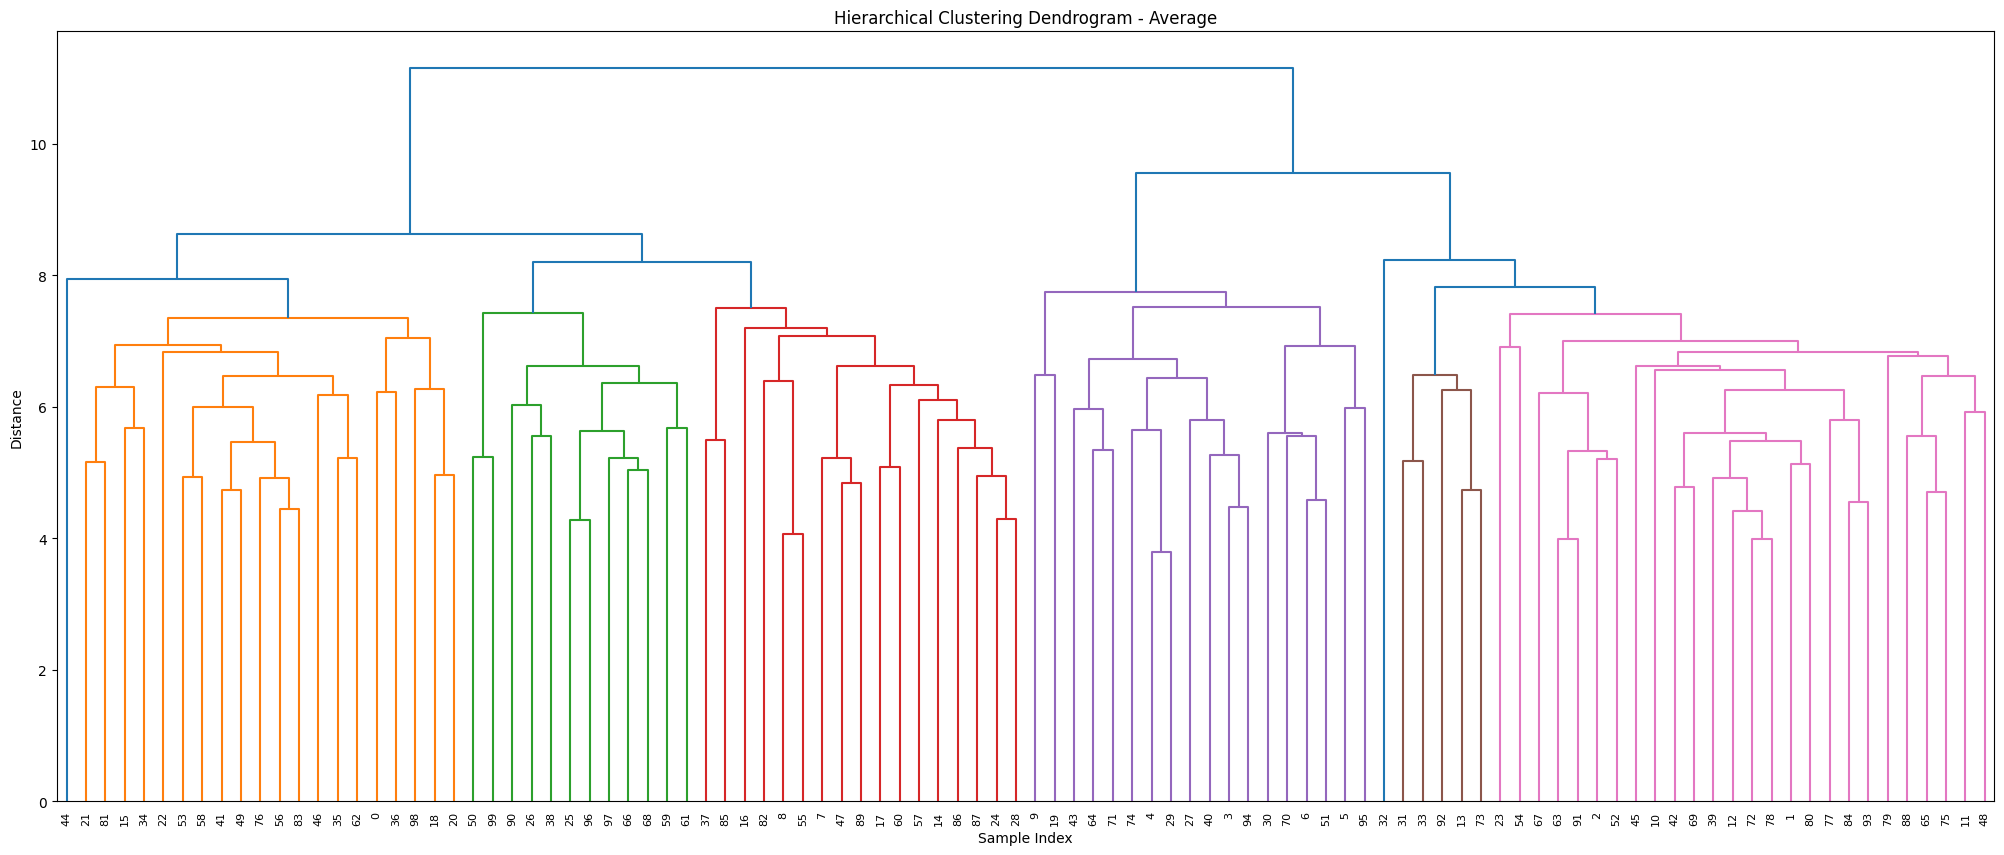

In [16]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Average')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z, leaf_font_size=8.)

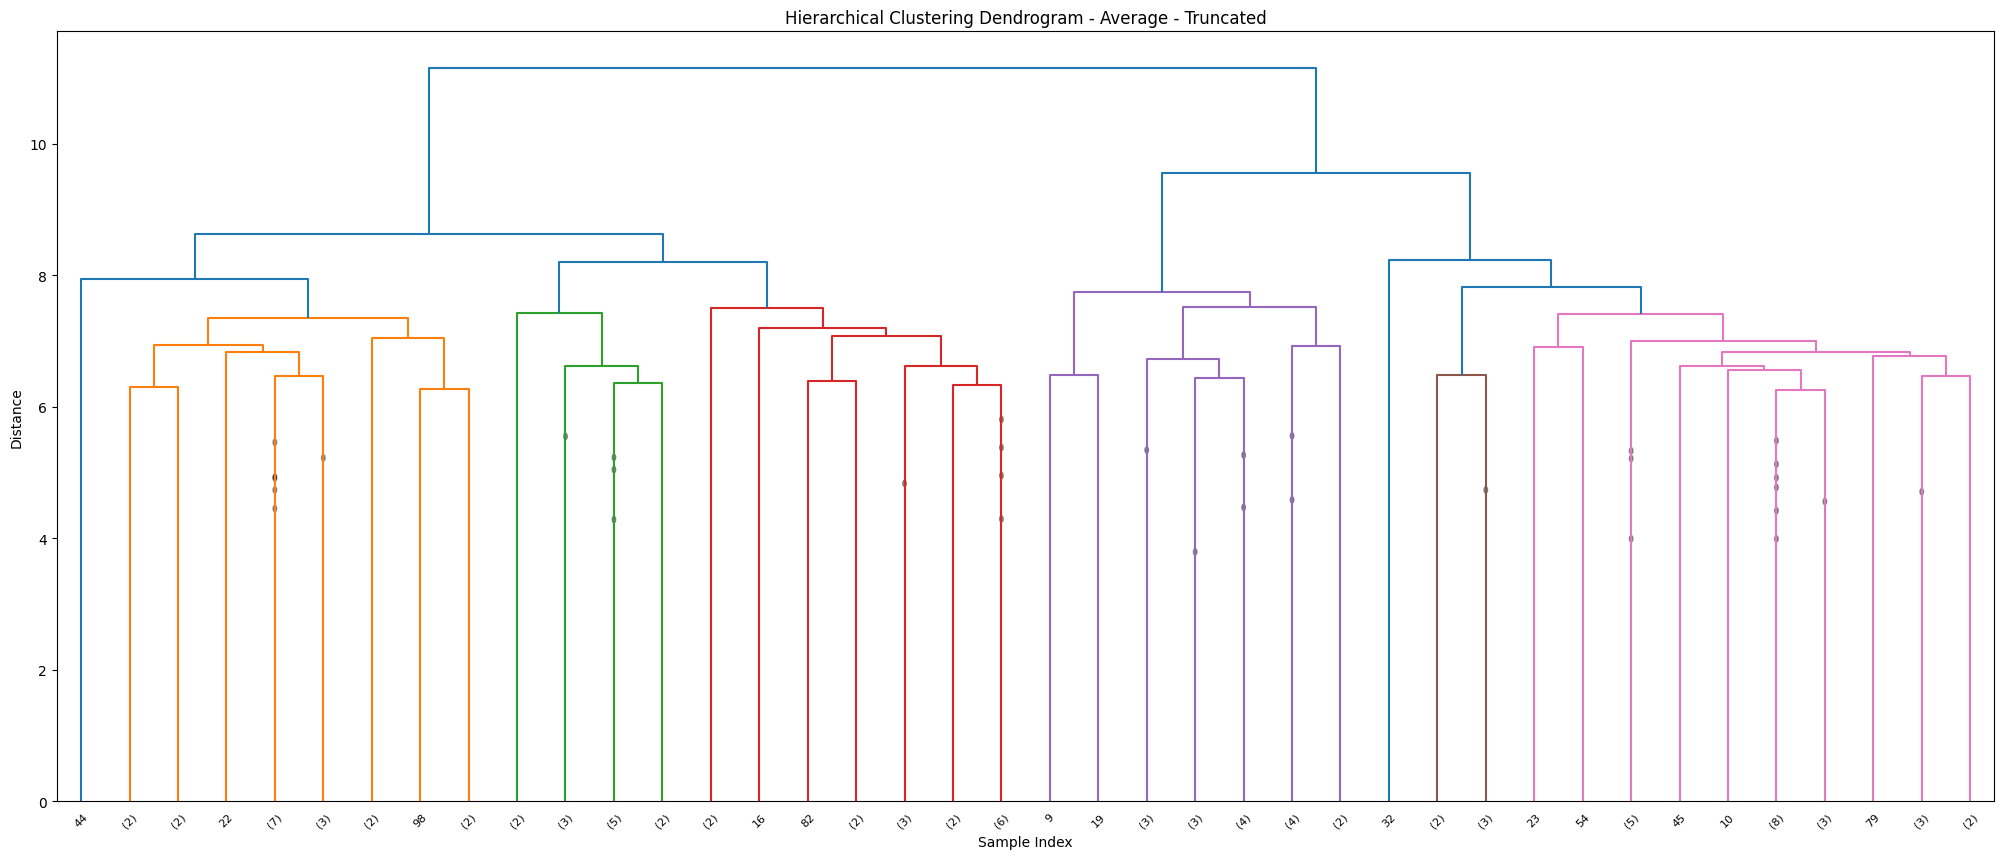

In [17]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Average - Truncated')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z, leaf_font_size=8., truncate_mode='lastp', p=40, show_contracted=True)